In [137]:
%pip install seaborn as sns
%pip install matplotlib as plt
%pip install pandas as pd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [139]:
df = pd.read_csv('trx_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  war

Gráfico guardado como 'gastos_mensuales_tendencia_y_pronostico_mejorado.png'


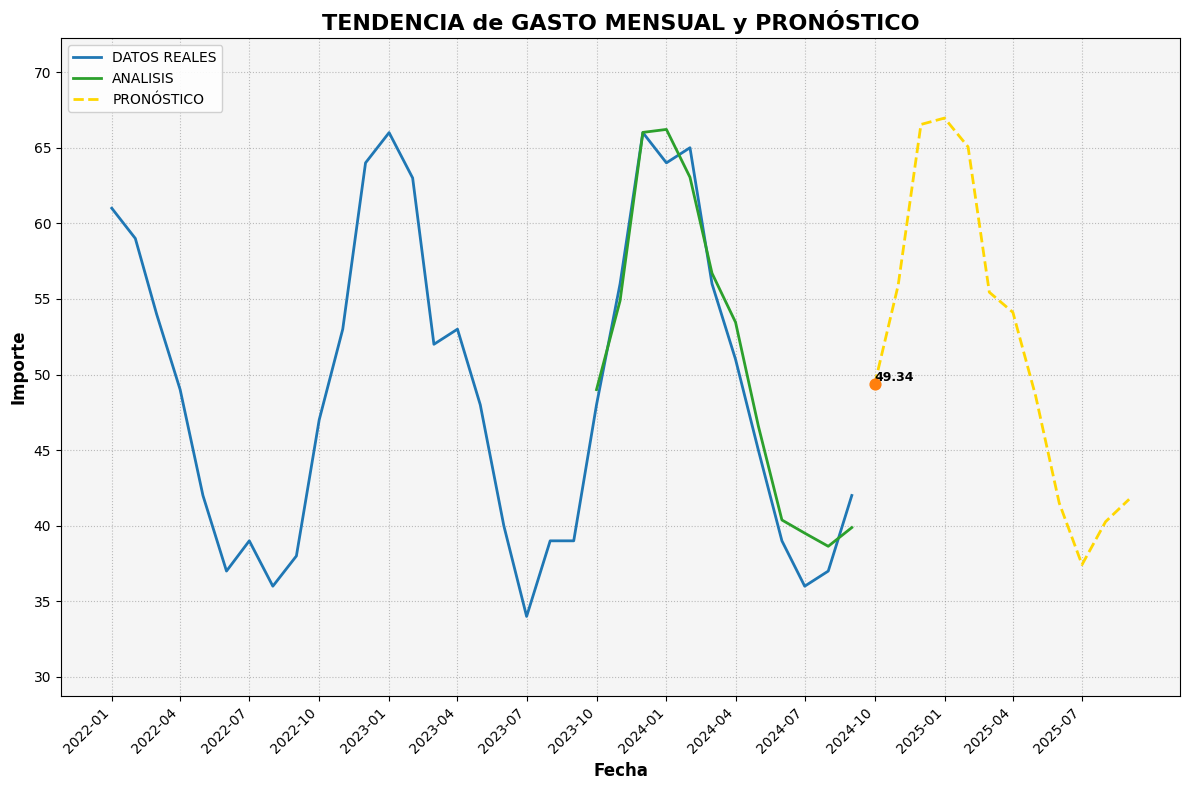


Valores pronosticados para los próximos 12 meses:
2024-10-01    49.340328
2024-11-01    55.900103
2024-12-01    66.539896
2025-01-01    66.961835
2025-02-01    65.058266
2025-03-01    55.441368
2025-04-01    54.113591
2025-05-01    48.573835
2025-06-01    41.501555
2025-07-01    37.424414
2025-08-01    40.265386
2025-09-01    41.749816
Freq: MS, Name: predicted_mean, dtype: float64


In [140]:
# Ajustar modelo SARIMA a todos los datos
model = SARIMAX(df['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Obtener los valores ajustados (fitted values) para los últimos 12 meses
last_12_months = df.last('12M').index[0]
fitted_values = results.get_prediction(start=last_12_months).predicted_mean

# Realizar pronóstico para los próximos 12 meses
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))
plt.style.use('default')

# Configurar el fondo del gráfico
ax = plt.gca()
ax.set_facecolor('#f5f5f5')

# Graficar todos los datos históricos en azul
plt.plot(df.index, df['Value'], color='#1f77b4', linewidth=2, label='DATOS REALES')

# Graficar la línea SARIMA de los últimos 12 meses en verde
plt.plot(fitted_values.index, fitted_values, color='#2ca02c', linewidth=2, label='ANALISIS')

# Graficar la línea de pronóstico de 12 meses en amarillo
plt.plot(forecast_mean.index, forecast_mean, color='#ffd700', linewidth=2, linestyle='--', label='PRONÓSTICO')

# Añadir un punto naranja para el primer mes de predicción
first_prediction = forecast_mean.iloc[0]
plt.scatter(forecast_mean.index[0], first_prediction, color='#ff7f0e', s=60, zorder=5)
plt.text(forecast_mean.index[0], first_prediction, f'{first_prediction:.2f}', ha='left', va='bottom', fontsize=9, weight='bold')

# Configurar el eje X para mostrar todas las fechas, incluido el pronóstico
all_dates = pd.date_range(start=df.index.min(), end=forecast_mean.index[-1], freq='MS')
plt.xticks(all_dates[::3], [date.strftime('%Y-%m') for date in all_dates[::3]], rotation=45, ha='right')

# Configurar los ejes
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Importe', fontsize=12, fontweight='bold')
plt.title('TENDENCIA de GASTO MENSUAL y PRONÓSTICO', fontsize=16, fontweight='bold')

# Ajustar las líneas de la cuadrícula
plt.grid(True, linestyle=':', color='gray', alpha=0.5, which='both')

# Añadir la leyenda
plt.legend(loc='upper left', frameon=True, framealpha=0.9)

# Ajustar los límites del eje y para dar un poco de espacio
y_min, y_max = plt.ylim()
plt.ylim(y_min - (y_max - y_min) * 0.1, y_max + (y_max - y_min) * 0.1)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()

# Guardar el gráfico como imagen
plt.savefig('gastos_mensuales_tendencia_y_pronostico_mejorado.png', dpi=300, bbox_inches='tight')
print("Gráfico guardado como 'gastos_mensuales_tendencia_y_pronostico_mejorado.png'")

# Mostrar el gráfico
plt.show()

# Imprimir los valores pronosticados para verificación
print("\nValores pronosticados para los próximos 12 meses:")
print(forecast_mean)
